<a href="https://colab.research.google.com/github/22b1074/Vehicle-Detection-IE-643-/blob/main/CorrectRainyFoggy_100__epochs_Finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
# Install the required dependencies
!pip install -r requirements.txt
%cd ..

Cloning into 'yolov5'...
remote: Enumerating objects: 17063, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 17063 (delta 21), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17063/17063), 15.68 MiB | 31.61 MiB/s, done.
Resolving deltas: 100% (11716/11716), done.
/yolov5
/


In [ ]:
classes_of_interest = {
    'bicycle': 0,
    'motorcycle': 1,
    'car': 2,
    'truck': 3,
    'bus': 4
}

In [ ]:
import shutil
import os
source_path = '/content/drive/MyDrive/NormalWeather_IE643/val/labels'
destination_path = '/content/input/val/labels'
os.makedirs(destination_path, exist_ok=True)
filenames = os.listdir(source_path)
for filename in filenames:
    if filename.endswith('.txt'):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        shutil.copy(source_file, destination_file)

In [ ]:
import shutil
import os
source_path = '/content/drive/MyDrive/NormalWeather_IE643/val/images'
destination_path = '/content/input/val/images'
os.makedirs(destination_path, exist_ok=True)
filenames = os.listdir(source_path)
for filename in filenames:
    if filename.endswith('.png'):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        shutil.copy(source_file, destination_file)

In [ ]:
import shutil
import os
source_path = '/content/drive/MyDrive/RainyFinal_IE643/val/labels'
destination_path = '/content/input_combined/val/labels'
os.makedirs(destination_path, exist_ok=True)
filenames = os.listdir(source_path)
for filename in filenames:
    if filename.endswith('.txt'):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        shutil.copy(source_file, destination_file)

In [ ]:
import shutil
import os
source_path = '/content/drive/MyDrive/foggy_IE643/val/labels'
destination_path = '/content/input_combined/val/labels'
os.makedirs(destination_path, exist_ok=True)
filenames = os.listdir(source_path)
for filename in filenames:
    if filename.endswith('.txt'):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        shutil.copy(source_file, destination_file)

In [ ]:
import shutil
source_path = '/content/drive/MyDrive/RainyFinal_IE643/val/images'
destination_path = '/content/input_combined/val/images'
os.makedirs(destination_path, exist_ok=True)
filenames = os.listdir(source_path)
for filename in filenames:
    if filename.endswith('.png'):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        shutil.copy(source_file, destination_file)

In [ ]:
import shutil
source_path = '/content/drive/MyDrive/foggy_IE643/train/images'
destination_path = '/content/input_combined/train/images'
os.makedirs(destination_path, exist_ok=True)
filenames = os.listdir(source_path)
for filename in filenames:
    if filename.endswith('.png'):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        shutil.copy(source_file, destination_file)

In [ ]:
import os

# label files
label_dir = '/content/input/train/labels'  # Change path if needed

class_counts = {label: 0 for label in classes_of_interest.keys()}
num_files = 0
# Iterate over all label files
for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt'):  # Ensure it's a label file
        with open(os.path.join(label_dir, label_file), 'r') as f:
            lines = f.readlines()
            num_files += 1
            for line in lines:
                class_id = int(float(line.split()[0]))  # class id extraction
                for class_name, id in classes_of_interest.items():
                    if class_id == id:
                        class_counts[class_name] += 1

# Print the number of images in each class
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} instances")

total_instances = sum(class_counts.values())
num_classes = 5
class_weights = {class_name: total_instances / (num_classes * count) for class_name, count in class_counts.items()}
print(class_weights)
print(num_files)

bicycle: 4717 instances
motorcycle: 1161 instances
car: 5417 instances
truck: 360 instances
bus: 543 instances
{'bicycle': 0.5171931312274751, 'motorcycle': 2.1012919896640825, 'car': 0.4503599778475171, 'truck': 6.776666666666666, 'bus': 4.492817679558011}
2710


In [ ]:
class_weights_here = [ 0.5171931312274751,  2.1012919896640825, 0.4503599778475171, 6.776666666666666, 4.492817679558011]

In [ ]:
# Path to the train.py file
train_py_path = '/content/yolov5/classify/train.py'

# Read the file
with open(train_py_path, 'r') as file:
    lines = file.readlines()

# Print the 190th to 200th lines to check the context
for i in range(190, 200):
    print(f"{i+1}: {lines[i]}")

# Prepare the new criterion line with class weights
new_criterion_line = f"    criterion = smartCrossEntropyLoss(label_smoothing=opt.label_smoothing, class_weights={class_weights_here})  # loss function\n"

lines[198] = new_criterion_line
# Restore the 200th line
#lines[199] = "    best_fitness = 0.0\n"
# Write the modified content back to the file
with open(train_py_path, 'w') as file:
    file.writelines(lines)


191:     ema = ModelEMA(model) if RANK in {-1, 0} else None

192: 

193:     # DDP mode

194:     if cuda and RANK != -1:

195:         model = smart_DDP(model)

196: 

197:     # Train

198:     t0 = time.time()

199:     criterion = smartCrossEntropyLoss(label_smoothing=opt.label_smoothing)  # loss function

200:     best_fitness = 0.0



In [ ]:
# Path to the yolov5m.yaml file
yaml_path = "/content/yolov5/models/yolov5m.yaml"

# Open the file, read contents, and modify 'nc'
with open(yaml_path, 'r') as file:
    lines = file.readlines()

# Rewrite the file with updated number of classes
with open(yaml_path, 'w') as file:
    for line in lines:
        if line.strip().startswith('nc:'):
            file.write('nc: 5\n')  # Updateing to 5 classes from 80classes in yolo5vm.yaml
        else:
            file.write(line)

print("Updated yolov5m.yaml with nc=5.")

Updated yolov5m.yaml with nc=5.


In [ ]:
# Define paths and class names
train_images_path = '/content/input/train/images'  # Path to your training images
train_labels_path = '/content/input/train/labels'  # Path to your training labels
val_images_path = '/content/input/val/images'      # Path to your validation images
val_labels_path = '/content/input/val/labels'      # Path to your validation labels

# Define class names
class_names = ['bicycle', 'motorcycle', 'car', 'truck', 'bus']  # Adjust to your classes

# Create the data.yaml file
data_yaml_content = f"""
train: {train_images_path}
val: {val_images_path}

nc: {len(class_names)}  # Number of classes
names: {class_names}  # Class names
"""
os.makedirs('/content/working', exist_ok=True)
# Write to data.yaml file
with open('/content/working/data.yaml', 'w') as f:
    f.write(data_yaml_content)

print("data.yaml file created successfully!")

data.yaml file created successfully!


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!python train.py --img 640 --batch-size 8 --epochs 15 --data /content/working/data.yaml --cfg yolov5m.yaml --weights '/content/drive/MyDrive/yolov5_training/yolov5_custom16/weights/best.pt' --name yolov5_custom --project '/content/drive/MyDrive/yolov5_training'


Streaming output truncated to the last 5000 lines.
       7/14         0G    0.03609    0.02349   0.004522         77        640:  71% 239/339 [05:53<02:36,  1.56s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       7/14         0G     0.0361     0.0235   0.004525         73        640:  71% 240/339 [05:55<02:31,  1.53s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       7/14         0G     0.0361     0.0235    0.00452         76        640:  71% 241/339 [05:56<02:28,  1.52s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       7/14         0G    0.036

Above is 75 epochs for normal weather training and next 75-90 i trained in fun mail
After 75 epochs its

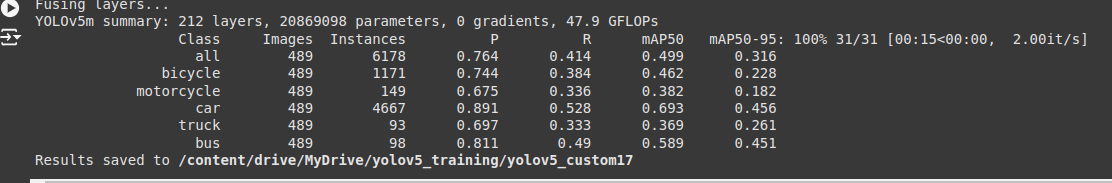

In [ ]:
!python train.py --img 640 --batch-size 8 --epochs 100 --data /content/working/data.yaml --cfg yolov5m.yaml --weights '/content/drive/MyDrive/yolov5_training/yolov5_custom16/weights/best.pt' --name yolov5_combined_finetune --project '/content/drive/MyDrive/yolov5_combined_finetuning'


Streaming output truncated to the last 5000 lines.
      48/99         0G    0.03054    0.01951   0.003473         78        640:  63% 29/46 [00:45<00:25,  1.52s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      48/99         0G     0.0306    0.01971   0.003469         75        640:  65% 30/46 [00:46<00:24,  1.50s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      48/99         0G    0.03069    0.01987    0.00345         90        640:  67% 31/46 [00:48<00:22,  1.52s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      48/99         0G    0.03089    

In [ ]:
%cd ..

/


In [ ]:
import os
empty_val_dir = '/content/empty_val_dir'
os.makedirs(empty_val_dir, exist_ok=True)


In [ ]:
# Define paths and class names
test_images_path = '/content/input_normal/test/images'  # Path to your training images
test_labels_path = '/content/input_normal/test/labels'  # Path to your training labels
val_images_path = empty_val_dir
val_labels_path = empty_val_dir
train_images_path = empty_val_dir
tranin_labels_path = empty_val_dir
# Define class names
class_names = ['bicycle', 'motorcycle', 'car', 'truck', 'bus']  # Adjust to your classes

# Create the data.yaml file
data_test_normal_yaml_content = f"""
test: {test_images_path}
val: {val_images_path}
train: {train_images_path}
nc: {len(class_names)}  # Number of classes
names: {class_names}  # Class names
"""
os.makedirs('/content/working', exist_ok=True)
# Write to data.yaml file
with open('/content/working/data_test_normal.yaml', 'w') as f:
    f.write(data_test_normal_yaml_content)

print("data.yaml file created successfully!")

data.yaml file created successfully!


In [ ]:
!cat /content/working/data_test_rainy.yaml


train: /content/empty_val_dir
test: /content/input_rainy/test/images
val: /content/empty_val_dir
nc: 5  # Number of classes
names: ['bicycle', 'motorcycle', 'car', 'truck', 'bus']  # Class names


In [ ]:
# Define paths and class names
test_images_path = '/content/input_rainy/test/images'  # Path to your training images
test_labels_path = '/content/input_rainy/test/labels'  # Path to your training labels
val_images_path = empty_val_dir
val_labels_path = empty_val_dir
train_images_path = empty_val_dir
tranin_labels_path = empty_val_dir
# Define class names
class_names = ['bicycle', 'motorcycle', 'car', 'truck', 'bus']  # Adjust to your classes

# Create the data.yaml file
data_test_rainy_yaml_content = f"""
train: {train_images_path}
test: {test_images_path}
val: {val_images_path}
nc: {len(class_names)}  # Number of classes
names: {class_names}  # Class names
"""
os.makedirs('/content/working', exist_ok=True)
# Write to data.yaml file
with open('/content/working/data_test_rainy.yaml', 'w') as f:
    f.write(data_test_rainy_yaml_content)

print("data.yaml file created successfully!")

data.yaml file created successfully!


In [ ]:
# Define paths and class names
test_images_path = '/content/input_foggy/test/images'  # Path to your training images
test_labels_path = '/content/input_foggy/test/labels'  # Path to your training labels
val_images_path = empty_val_dir
val_labels_path = empty_val_dir
train_images_path = empty_val_dir
tranin_labels_path = empty_val_dir
# Define class names
class_names = ['bicycle', 'motorcycle', 'car', 'truck', 'bus']  # Adjust to your classes

# Create the data.yaml file
data_test_foggy_yaml_content = f"""
train: {train_images_path}
test: {test_images_path}
val: {val_images_path}
nc: {len(class_names)}  # Number of classes
names: {class_names}  # Class names
"""
os.makedirs('/content/working', exist_ok=True)
# Write to data.yaml file
with open('/content/working/data_test_foggy.yaml', 'w') as f:
    f.write(data_test_foggy_yaml_content)

print("data.yaml file created successfully!")

data.yaml file created successfully!


In [ ]:
import shutil
import os
source_path = '/content/drive/MyDrive/NormalWeather_IE643/test/labels'
destination_path = '/content/input_normal/test/labels'
os.makedirs(destination_path, exist_ok=True)
filenames = os.listdir(source_path)
for filename in filenames:
    if filename.endswith('.txt'):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        shutil.copy(source_file, destination_file)

In [20]:
import shutil
import os
source_path = '/content/drive/MyDrive/RainyFinal_IE643/test/labels'
destination_path = '/content/input_rainy/test/labels'
os.makedirs(destination_path, exist_ok=True)
filenames = os.listdir(source_path)
for filename in filenames:
    if filename.endswith('.txt'):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        shutil.copy(source_file, destination_file)

In [21]:
import shutil
import os
source_path = '/content/drive/MyDrive/foggy_IE643/test/labels'
destination_path = '/content/input_foggy/test/labels'
os.makedirs(destination_path, exist_ok=True)
filenames = os.listdir(source_path)
for filename in filenames:
    if filename.endswith('.txt'):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        shutil.copy(source_file, destination_file)

In [ ]:
import shutil
source_path = '/content/drive/MyDrive/NormalWeather_IE643/test/images'
destination_path = '/content/input_normal/test/images'
os.makedirs(destination_path, exist_ok=True)
filenames = os.listdir(source_path)
for filename in filenames:
    if filename.endswith('.png'):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        shutil.copy(source_file, destination_file)

In [22]:
import shutil
source_path = '/content/drive/MyDrive/RainyFinal_IE643/test/images'
destination_path = '/content/input_rainy/test/images'
os.makedirs(destination_path, exist_ok=True)
filenames = os.listdir(source_path)
for filename in filenames:
    if filename.endswith('.png'):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        shutil.copy(source_file, destination_file)

In [23]:
import shutil
source_path = '/content/drive/MyDrive/foggy_IE643/test/images'
destination_path = '/content/input_foggy/test/images'
os.makedirs(destination_path, exist_ok=True)
filenames = os.listdir(source_path)
for filename in filenames:
    if filename.endswith('.png'):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        shutil.copy(source_file, destination_file)

In [ ]:
%cd ..


/


In [ ]:
%cd yolov5

/yolov5


In [25]:
!python val.py --weights '/content/drive/MyDrive/yolov5_combined_finetuning (1)/yolov5_combined_finetune/weights/best.pt' --data /content/working/data_test_normal.yaml --img 640 --batch-size 8 --task test  --conf-thres 0.25


val: data=/content/working/data_test_normal.yaml, weights=['/content/drive/MyDrive/yolov5_combined_finetuning (1)/yolov5_combined_finetune/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.25, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.25 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-387-g4c904ac7 Python-3.10.12 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5m summary: 212 layers, 20869098 parameters, 0 gradients, 47.9 GFLOPs
100% 755k/755k [00:00<00:00, 13.9MB/s]
test: Scanning /content/input_normal/test/labels... 490 images, 0 backgrounds, 0 corrupt: 100% 490/490 [00:00<00:00, 1673.38it/s]
test: WARNING ⚠️ /content/input_normal/test/images/cologne_000007_000019.png: 2 duplicate labels removed
test: WARNING ⚠️ /content/input_normal/test/images/cologn

Nomal Images Tested Performance

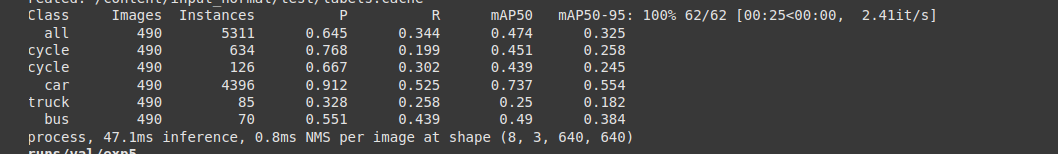

In [26]:
!python val.py --weights '/content/drive/MyDrive/yolov5_combined_finetuning (1)/yolov5_combined_finetune/weights/best.pt' --data /content/working/data_test_foggy.yaml --img 640 --batch-size 8 --task test  --conf-thres 0.25


val: data=/content/working/data_test_foggy.yaml, weights=['/content/drive/MyDrive/yolov5_combined_finetuning (1)/yolov5_combined_finetune/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.25, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.25 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-387-g4c904ac7 Python-3.10.12 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5m summary: 212 layers, 20869098 parameters, 0 gradients, 47.9 GFLOPs
test: Scanning /content/input_foggy/test/labels... 52 images, 0 backgrounds, 0 corrupt: 100% 52/52 [00:00<00:00, 954.90it/s]
test: WARNING ⚠️ /content/input_foggy/test/images/darmstadt_000083_000019_foggy.png: 1 duplicate labels removed
test: New cache created: /content/input_foggy/test/labels.cache
                 Class     Imag

Foogy weather test data Performance

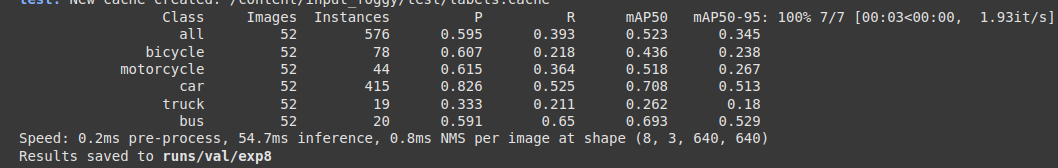

In [30]:
!python val.py --weights '/content/drive/MyDrive/yolov5_combined_finetuning (1)/yolov5_combined_finetune/weights/best.pt' --data /content/working/data_test_rainy.yaml --img 640 --batch-size 8 --task test  --conf-thres 0.25


val: data=/content/working/data_test_rainy.yaml, weights=['/content/drive/MyDrive/yolov5_combined_finetuning (1)/yolov5_combined_finetune/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.25, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.25 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-387-g4c904ac7 Python-3.10.12 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5m summary: 212 layers, 20869098 parameters, 0 gradients, 47.9 GFLOPs
test: Scanning /content/input_rainy/test/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100% 11/11 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:01<00:00,  1.36it/s]
                   all         11        147      0.519      0.203      0.296      0.1

Rainy Images Test performance

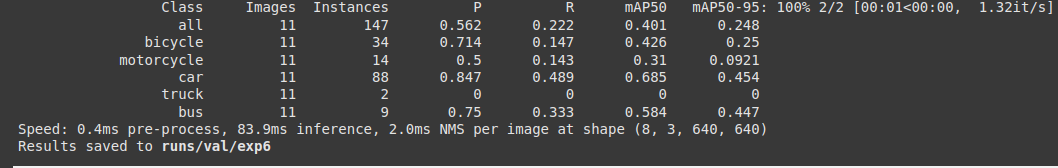

In [ ]:
source_dir = '/content/yolov5/runs/val/exp5'
dest_dir = '/content/drive/MyDrive/NormalWeather_Performance_Test'

os.makedirs(dest_dir, exist_ok=True)

for filename in os.listdir(source_dir):
        source_file = os.path.join(source_dir, filename)
        destination_file = os.path.join(dest_dir, filename)
        shutil.copy(source_file, destination_file)


In [ ]:
source_dir = '/content/yolov5/runs/val/exp6'
dest_dir = '/content/drive/MyDrive/Rainy_Performance_Test'

os.makedirs(dest_dir, exist_ok=True)

for filename in os.listdir(source_dir):
        source_file = os.path.join(source_dir, filename)
        destination_file = os.path.join(dest_dir, filename)
        shutil.copy(source_file, destination_file)


In [ ]:
source_dir = '/content/yolov5/runs/val/exp8'
dest_dir = '/content/drive/MyDrive/foggy_Performance_Test'

os.makedirs(dest_dir, exist_ok=True)

for filename in os.listdir(source_dir):
        source_file = os.path.join(source_dir, filename)
        destination_file = os.path.join(dest_dir, filename)
        shutil.copy(source_file, destination_file)


In [ ]:
%cd ..


/


In [ ]:
from google.colab import files

# Upload the image
uploaded = files.upload()


Saving frame_3837_jpg.rf.7cdff66e6350318c835a7cf1b35525f0.jpg to frame_3837_jpg.rf.7cdff66e6350318c835a7cf1b35525f0.jpg


In [ ]:
%cd yolov5

[Errno 2] No such file or directory: 'yolov5'
/content


In [ ]:
!python detect.py --weights '/content/drive/MyDrive/yolov5_combined_finetuning/yolov5_combined_finetune/weights/best.pt' --source '/content/yolov5/frame_3837_jpg.rf.7cdff66e6350318c835a7cf1b35525f0.jpg' --conf-thres 0.25 --imgsz 640 --save-crop


detect: weights=['/content/drive/MyDrive/yolov5_combined_finetuning/yolov5_combined_finetune/weights/best.pt'], source=/content/yolov5/frame_3837_jpg.rf.7cdff66e6350318c835a7cf1b35525f0.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5m summary: 212 layers, 20869098 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/yolov5/frame_3837_jpg.rf.7cdff66e6350318c835a7cf1b35525f0.jpg: 640x640 9 cars, 1193.7ms
Speed: 11.9ms pre-process, 1193.7ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/det

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8m.pt')  # Change this to your specific model if needed

# Print model configuration
print(model)


# Print the number of layers
print(f"Total layers in YOLOv5m: {len(list(model.parameters()))}")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 156MB/s]


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_